In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras_utils import detect_lp
from os.path import splitext,basename
from keras.models import model_from_json
import glob
from utils import im2single
from label import Shape, writeShapes


def load_model(path):
    try:
        path = splitext(path)[0]
        with open('%s.json' % path, 'r') as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json, custom_objects={})
        model.load_weights('%s.h5' % path)
        print("Loading model successfully...")
        return model
    except Exception as e:
        print(e)

wpod_net_path = "wpod-net"
wpod_net = load_model(wpod_net_path)
image_paths = glob.glob("Plate_examples/*.jpg")


Loading model successfully...


Detect 1 plate(s) in usa_motor_plate


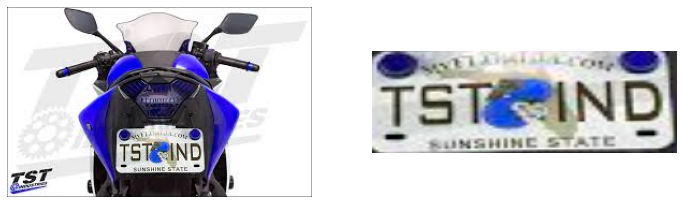

In [30]:
lp_threshold=0.5
def get_plate(image_path, Dmax=608, Dmin=256):
    Ivehicle = cv2.imread(image_path)
    # print(Ivehicle.shape)
    # print(Ivehicle.shape[:2])
    ratio = float(max(Ivehicle.shape[:2]))/min(Ivehicle.shape[:2])
    # print(ratio)
    side  = int(ratio*288.)
    bound_dim = min(side + (side%(2**4)),608)
    # print (bound_dim)

    Llp,LlpImgs,_ = detect_lp(wpod_net,im2single(Ivehicle),bound_dim,2**4,(240,80),lp_threshold)


    return Llp, LlpImgs

# Obtain plate image and its coordinates from an image
test_image = image_paths[2]
test_coords,cropped_test_image = get_plate(test_image)
print("Detect %i plate(s) in"%len(test_coords),splitext(basename(test_image))[0])
# print("Coordinate of plate(s) in image: \n", test_coords[0].pts)
# print("Array for image", len(cropped_test_image[0]), cropped_test_image)

# Visualize our result
img1 = cv2.imread(test_image)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(cropped_test_image[0])

#plt.savefig("part1_result.jpg",dpi=300)

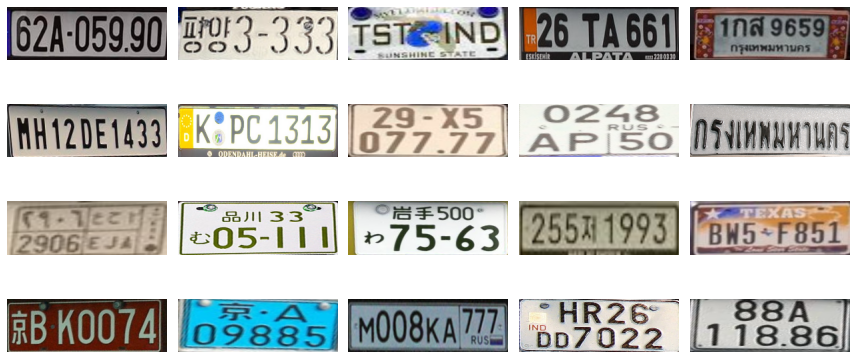

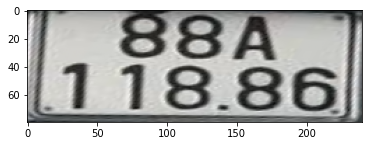

In [31]:
fig = plt.figure(figsize=(12,6))
cols = 5
rows = 4
all_cropped_plates = []
all_coords = []

for i in range(cols*rows):
    fig.add_subplot(rows,cols,i+1)
    coords,cropped_image = get_plate(image_paths[i])
    plt.axis(False)
    plt.imshow(cropped_image[0])
    all_cropped_plates.append(cropped_image[0])
    all_coords.append(coords)

plt.tight_layout()
plt.show(fig)
plt.imshow(cropped_image[0])

Detect 2 plate(s) in multiple_plates


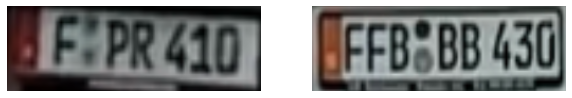

In [24]:
multiple_plates_image = "Plate_examples/multiple_plates.png"
coords_multiple,mul_cropped_plates = get_plate(multiple_plates_image)

print("Detect %i plate(s) in"%len(mul_cropped_plates),splitext(basename(multiple_plates_image))[0])

# Visualize the original image
# plt.figure(figsize=(10,5))
# plt.axis(False)
# plt.imshow(multiple_plates_image)
# print(mul_cropped_plates)

# Visualize the obtained plates
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(mul_cropped_plates[1])
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(mul_cropped_plates[0])

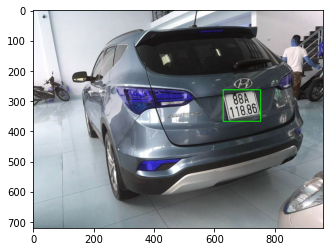

In [32]:
img = cv2.imread(image_paths[19])
h, w, c = img.shape
x = coords[0].pts
start_point = (int(w*min(x[0])), int(h*min(x[1])))
end_point = (int(w*max(x[0])),  int(h*max(x[1])))

cv2.rectangle(img, start_point, end_point, color = (0,255,0), thickness=2)
plt.imshow(img)

In [61]:
# print(len(cropped_image))
# print(len(cropped_image[0]))
# print(len(cropped_image[0][0]))
# print(len(cropped_image[0][0][0]))
# print(np.amax(cropped_image[0]))
# print(cropped_image[0])
from PIL import Image
im = Image.fromarray(np.uint8((cropped_image[0])*255))
im.save("new.jpg")